Load Libraries: We'll need to import pandas for data handling and os for navigating the file system.
Read Files: We will loop through the directory containing the CSV files, read each one, and modify the data accordingly.
Modify Data: Add a new column that captures the location extracted from the filename.

In [10]:
import pandas as pd
import os

# Define the directory containing the CSV files
directory_path = '../dataset'

# List to hold all the dataframes
dataframes = []

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Create the full path to the file
        file_path = os.path.join(directory_path, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Extract location name by splitting on " 2014-" which is part of the date pattern in the filename
        location = filename.split(' 2014-')[0]
        
        # Add a new column for the location
        df['Location'] = location
        
        # Append the dataframe to the list
        dataframes.append(df)

# Optional: Combine all dataframes into a single dataframe if necessary
combined_df = pd.concat(dataframes, ignore_index=True)

# Show the combined dataframe
print(combined_df.head())


     datetime  temp  humidity  precipcover preciptype  windspeed  \
0  2014-01-01   3.2      58.0         0.00        NaN       15.6   
1  2014-01-02   2.0      82.6        29.17  rain,snow       17.6   
2  2014-01-03  -5.4      54.4        12.50  rain,snow       47.9   
3  2014-01-04  -3.8      53.2         0.00        NaN       20.9   
4  2014-01-05   2.8      79.1        20.83  rain,snow       17.0   

   sealevelpressure  cloudcover  solarradiation  solarenergy  ...  \
0            1027.0        66.2           117.6         10.2  ...   
1            1011.9        95.1            34.1          2.9  ...   
2            1021.9        39.5           126.7         10.9  ...   
3            1030.9        16.1           125.7         10.9  ...   
4            1020.0        97.5            24.0          1.9  ...   

   windspeed80  winddir80  windspeed100  winddir100  ghiradiation  \
0          0.0        NaN           0.0         NaN           NaN   
1          0.0        NaN           0.

In [11]:
combined_df.columns

Index(['datetime', 'temp', 'humidity', 'precipcover', 'preciptype',
       'windspeed', 'sealevelpressure', 'cloudcover', 'solarradiation',
       'solarenergy', 'soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20',
       'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20',
       'windspeed50', 'winddir50', 'windspeed80', 'winddir80', 'windspeed100',
       'winddir100', 'ghiradiation', 'dniradiation', 'difradiation',
       'gtiradiation', 'sunelevation', 'Location'],
      dtype='object')

In [12]:
import pandas as pd

# Assuming 'combined_df' is your DataFrame
# Display the number of missing values in each column
missing_values_count = combined_df.isnull().sum()
print("Missing values in each column:")
print(missing_values_count)


Missing values in each column:
datetime                0
temp                    0
humidity                0
precipcover             0
preciptype          20159
windspeed               0
sealevelpressure        0
cloudcover              0
solarradiation          0
solarenergy             0
soiltemp01           3662
soiltemp04           3662
soiltemp10           3662
soiltemp20           3662
soilmoisture01       3662
soilmoisture04       3662
soilmoisture10       3662
soilmoisture20       3662
windspeed50             0
winddir50            3640
windspeed80             0
winddir80            3640
windspeed100            0
winddir100           3640
ghiradiation         3640
dniradiation         3640
difradiation         3640
gtiradiation         3640
sunelevation            0
Location                0
dtype: int64


Based on the result of the missing value analysis, we'll proceed with the following steps:

Remove the preciptype column: Since this column has a substantial number of missing values and may not be critical for analyzing the impact of solar radiation on soil conditions.
Remove rows with missing values in the soil and wind-related columns: Given the significant count of missing values in soiltemp01, soiltemp04, soiltemp10, soiltemp20, soilmoisture01, soilmoisture04, soilmoisture10, soilmoisture20, winddir50, winddir80, winddir100, and gtiradiation, it's prudent to remove rows where any of these columns are missing to maintain data integrity for your analysis.

In [13]:
import pandas as pd

# Assuming 'combined_df' is your DataFrame

# Remove 'preciptype' column
combined_df.drop('preciptype', axis=1, inplace=True)

# Define columns where NaN rows should be removed
columns_with_nan = ['soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20',
                    'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20',
                    'winddir50', 'winddir80', 'winddir100', 'gtiradiation']

# Remove rows with NaN in any of the specified columns
combined_df.dropna(subset=columns_with_nan, inplace=True)

# Optionally, check the remaining missing values (if any)
remaining_missing_values = combined_df.isnull().sum()
print("Remaining missing values in each column:")
print(remaining_missing_values)

# Show the first few rows of the updated DataFrame
print(combined_df.head())


Remaining missing values in each column:
datetime            0
temp                0
humidity            0
precipcover         0
windspeed           0
sealevelpressure    0
cloudcover          0
solarradiation      0
solarenergy         0
soiltemp01          0
soiltemp04          0
soiltemp10          0
soiltemp20          0
soilmoisture01      0
soilmoisture04      0
soilmoisture10      0
soilmoisture20      0
windspeed50         0
winddir50           0
windspeed80         0
winddir80           0
windspeed100        0
winddir100          0
ghiradiation        0
dniradiation        0
difradiation        0
gtiradiation        0
sunelevation        0
Location            0
dtype: int64
       datetime  temp  humidity  precipcover  windspeed  sealevelpressure  \
364  2014-12-31   0.5      44.6         0.00       20.3            1028.9   
365  2015-01-01   2.1      46.0         0.00       22.6            1021.7   
366  2015-01-02   4.8      53.0         0.00       14.2            1025.6   


In [14]:
combined_df.head()

,datetime,temp,humidity,precipcover,windspeed,sealevelpressure,cloudcover,solarradiation,solarenergy,soiltemp01,...,windspeed80,winddir80,windspeed100,winddir100,ghiradiation,dniradiation,difradiation,gtiradiation,sunelevation,Location
364,2014-12-31,0.5,44.6,0.00,20.3,1028.9,33.9,120.0,10.4,0.4,...,12.2,229.6,18.0,228.6,0.0,0.0,0.0,0.0,28.0,Arlington
365,2015-01-01,2.1,46.0,0.00,22.6,1021.7,36.5,116.2,10.0,0.4,...,19.8,229.2,31.3,229.4,116.0,92.0,81.0,116.0,28.1,Arlington
366,2015-01-02,4.8,53.0,0.00,14.2,1025.6,76.6,93.0,8.0,2.4,...,15.5,287.4,24.5,287.9,93.0,54.0,72.0,93.0,28.2,Arlington
367,2015-01-03,3.8,78.3,50.00,10.2,1029.1,94.5,13.6,1.2,1.3,...,14.4,100.0,20.9,99.9,14.0,0.0,6.0,6.0,28.3,Arlington
368,2015-01-04,11.7,78.2,41.67,32.4,1012.6,94.7,18.7,1.6,5.6,...,34.2,225.9,45.7,225.9,19.0,0.0,12.0,12.0,28.4,Arlington


In [15]:
df = combined_df.copy()

In [16]:
df.head()

,datetime,temp,humidity,precipcover,windspeed,sealevelpressure,cloudcover,solarradiation,solarenergy,soiltemp01,...,windspeed80,winddir80,windspeed100,winddir100,ghiradiation,dniradiation,difradiation,gtiradiation,sunelevation,Location
364,2014-12-31,0.5,44.6,0.00,20.3,1028.9,33.9,120.0,10.4,0.4,...,12.2,229.6,18.0,228.6,0.0,0.0,0.0,0.0,28.0,Arlington
365,2015-01-01,2.1,46.0,0.00,22.6,1021.7,36.5,116.2,10.0,0.4,...,19.8,229.2,31.3,229.4,116.0,92.0,81.0,116.0,28.1,Arlington
366,2015-01-02,4.8,53.0,0.00,14.2,1025.6,76.6,93.0,8.0,2.4,...,15.5,287.4,24.5,287.9,93.0,54.0,72.0,93.0,28.2,Arlington
367,2015-01-03,3.8,78.3,50.00,10.2,1029.1,94.5,13.6,1.2,1.3,...,14.4,100.0,20.9,99.9,14.0,0.0,6.0,6.0,28.3,Arlington
368,2015-01-04,11.7,78.2,41.67,32.4,1012.6,94.7,18.7,1.6,5.6,...,34.2,225.9,45.7,225.9,19.0,0.0,12.0,12.0,28.4,Arlington


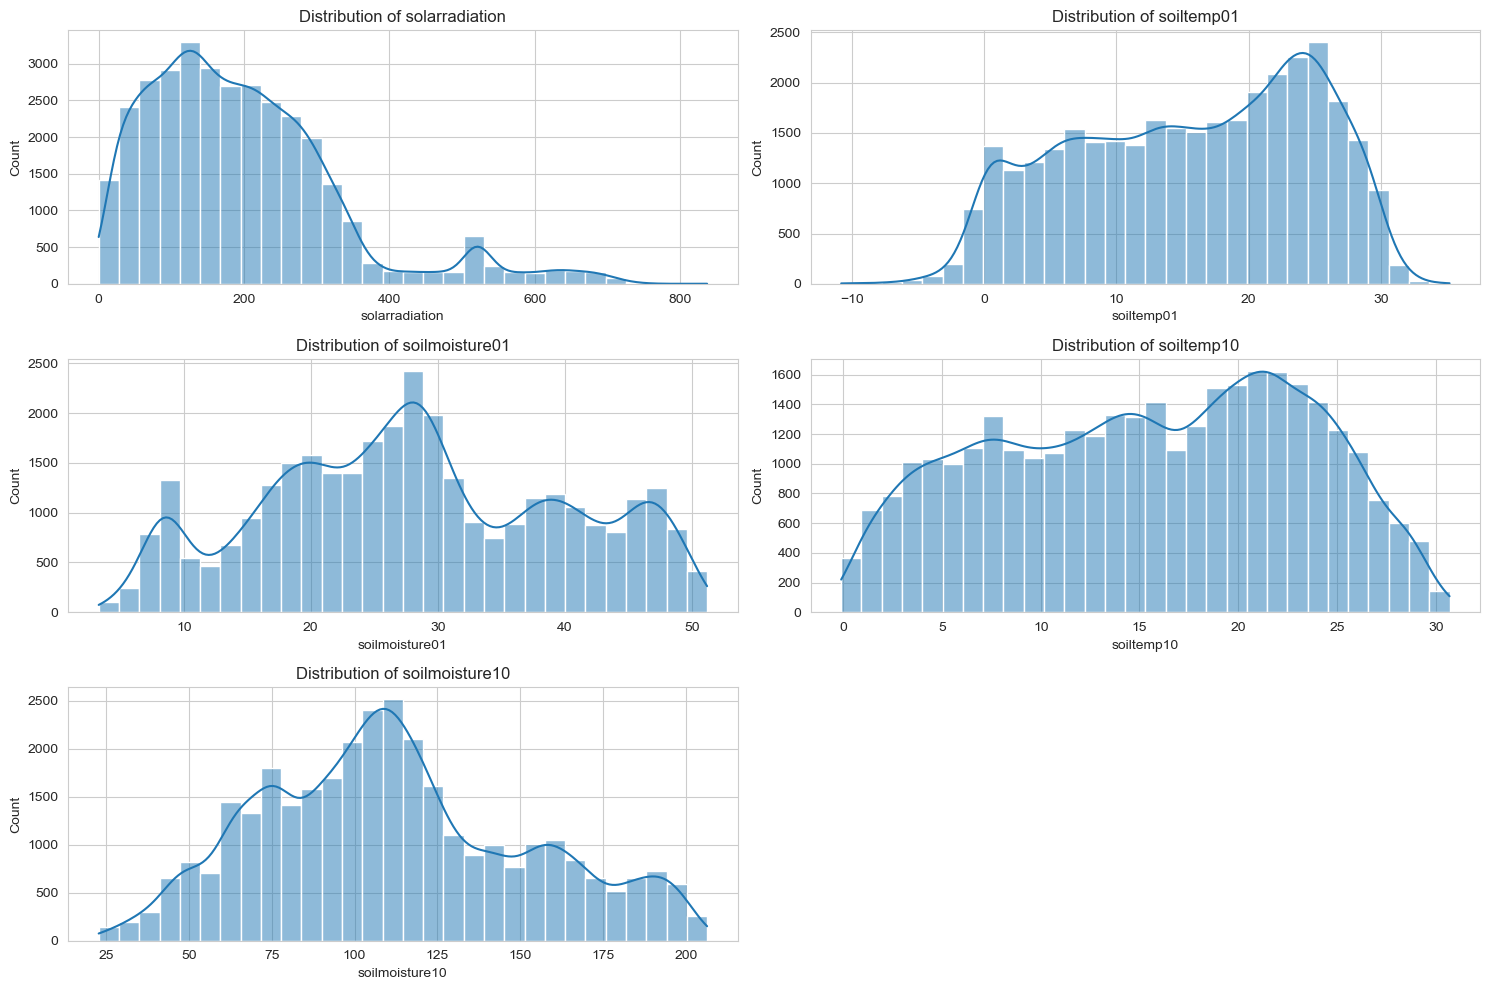

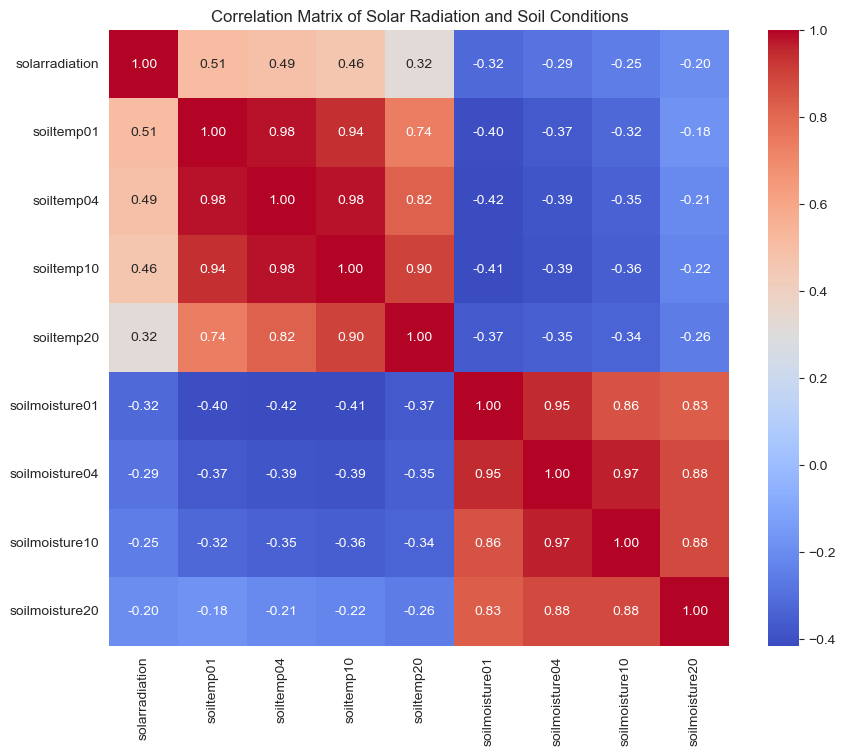

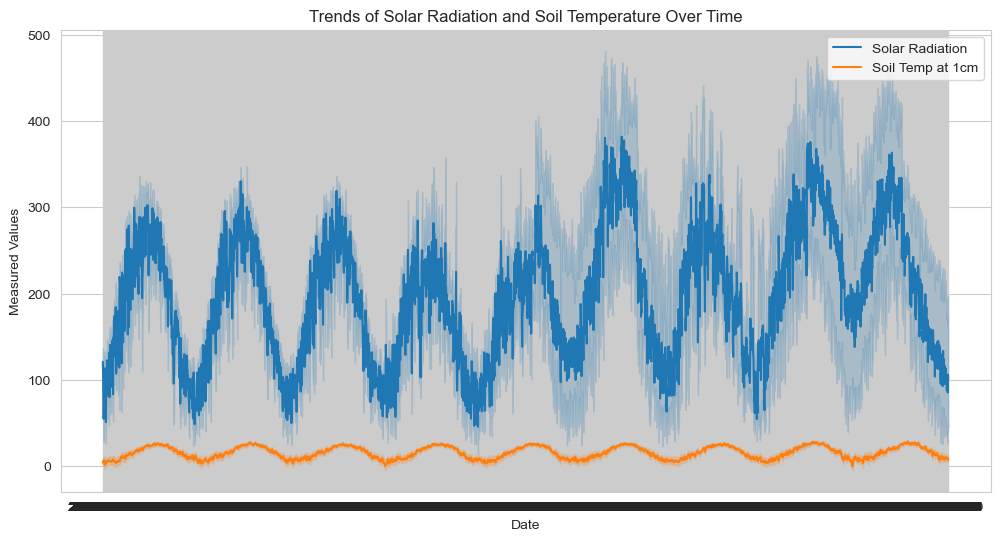

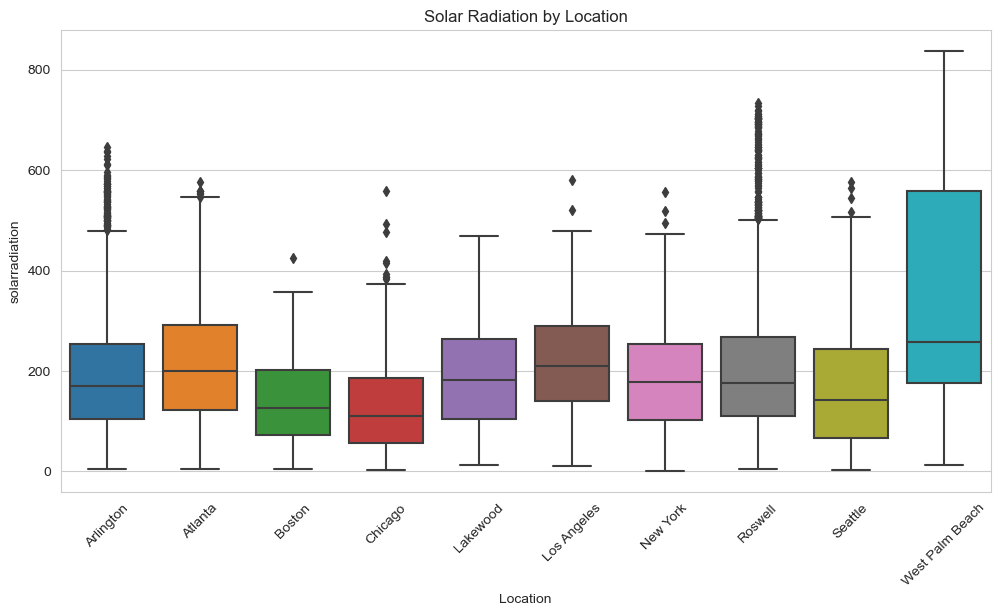

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Convert 'datetime' from string to datetime type if not already
df['datetime'] = pd.to_datetime(combined_df['datetime'])

# 1. Visualize Distribution of Key Variables
variables_to_plot = ['solarradiation', 'soiltemp01', 'soilmoisture01', 'soiltemp10', 'soilmoisture10']
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(combined_df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

# 2. Correlation Analysis
correlation_vars = ['solarradiation', 'soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20', 'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20']
correlation_matrix = combined_df[correlation_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Solar Radiation and Soil Conditions')
plt.show()

# 3. Trend Analysis Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='solarradiation', data=combined_df, label='Solar Radiation')
sns.lineplot(x='datetime', y='soiltemp01', data=combined_df, label='Soil Temp at 1cm')
plt.title('Trends of Solar Radiation and Soil Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Measured Values')
plt.legend()
plt.show()

# 4. Comparative Analysis by Location
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='solarradiation', data=combined_df)
plt.xticks(rotation=45)
plt.title('Solar Radiation by Location')
plt.show()


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming 'combined_df' is preprocessed and loaded with necessary columns
features = ['solarradiation', 'temp', 'humidity', 'windspeed', 'cloudcover']
target = 'soiltemp01'  # or 'soilmoisture01' depending on the model focus

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_df[features], combined_df[target], test_size=0.3, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 1.5777757833891086
RMSE: 2.0861325615343054


In [19]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming 'solar_radiation' is the feature and it is sequenced properly for time series forecasting
data = np.array(combined_df['solarradiation']).reshape(-1, 1)
n_steps = 3
X, y = [], []
for i in range(len(data) - n_steps):
    X.append(data[i:i + n_steps])
    y.append(data[i + n_steps])
X, y = np.array(X), np.array(y)

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit model
model.fit(X_train, y_train, epochs=100, verbose=0)

# Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)


206/206 [==============================] - 1s 1ms/step
MSE: 3797.1442904738883


In [ ]:
from codecarbon import EmissionsTracker

tracker = EmissionsTracker()
tracker.start()

# Insert the training part of your model here

emissions = tracker.stop()
print(f"Estimated CO2 emissions for training: {emissions} kg")
